# Hyperspectral Images(HSI) Analysis Simplified

### This tutorial focuses on:
1. Introduction
2. How to download HSI
3. Reading hyperspectral image
4. Visualizing the bands of the Hyperspectral image
5. Visualizing ground truth of the image.
6. Extracting pixels of the HSI
7. Visualizing spectral signatures

### 1. Introduction

In [1]:
from IPython.display import HTML

HTML('''<h5>See the below video which give a brief introduction on hyperspectral imaging.</h5><p>Credit- SPECIM</p></br>
        <center><iframe width="920" height="420"src="https://www.youtube-nocookie.com/embed/_sUZ96YZOQU" 
        frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" 
        allowfullscreen></iframe></center>''')


### 2. How to download Hyperspectral images

* The bench mark hyperspectral image datasets are available on the [Conputational intelligence Group](http://www.ehu.eus/ccwintco/index.php?title=Hyperspectral_Remote_Sensing_Scenes) website. 
* Copy the download link address of the hyperspectral image dataset and use **wget** command to download.
* The entire tutorial uses **Indian Pines HSI Dataset**.

In [2]:
!wget "http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat"

!wget "http://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat"   


--2021-07-25 12:01:40--  http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat
Resolving www.ehu.eus (www.ehu.eus)... 2001:720:1410::65, 158.227.0.65
Connecting to www.ehu.eus (www.ehu.eus)|2001:720:1410::65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5953527 (5.7M)
Saving to: ‘Indian_pines_corrected.mat.2’

Indian_pines_correc 100%[===================>]   5.68M   892KB/s    in 7.6s    

2021-07-25 12:01:48 (767 KB/s) - ‘Indian_pines_corrected.mat.2’ saved [5953527/5953527]

--2021-07-25 12:01:48--  http://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat
Resolving www.ehu.eus (www.ehu.eus)... 2001:720:1410::65, 158.227.0.65
Connecting to www.ehu.eus (www.ehu.eus)|2001:720:1410::65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1125 (1.1K)
Saving to: ‘Indian_pines_gt.mat.2’

Indian_pines_gt.mat 100%[===================>]   1.10K  --.-KB/s    in 0s      

2021-07-25 12:01:48 (39.8 MB/s) - ‘Indian_pines_gt.mat.2’ sa

* The files are stored in current working directory

In [3]:
!ls

 apt.txt	        Index.ipynb		       Indian_pines_gt.mat.1
'Data Analysis.ipynb'   Indian_pines_corrected.mat     part-1.ipynb
 Dataset.csv	        Indian_pines_corrected.mat.1
 environment.yml        Indian_pines_gt.mat


**Indian_pines_corrected.mat** - The data set in .mat format

**Indian_pines_gt.mat** - The ground truth of the dataset in .mat format

Groundtruth classes for the Indian Pines scene and their respective samples number


<table style="text-align:center;" align="left">
<tbody><tr>
<th colspan="3">
</th></tr>
<tr>
<th style="border-style: solid; border-width: 1px"> #
</th>
<th style="border-style: solid; border-width: 1px"> Class
</th>
<th style="border-style: solid; border-width: 1px"> Samples
</th></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 1
</td>
<td style="border-style: solid; border-width: 1px"> Alfalfa
</td>
<td style="border-style: solid; border-width: 1px"> 46
</td></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 2
</td>
<td style="border-style: solid; border-width: 1px"> Corn-notill
</td>
<td style="border-style: solid; border-width: 1px"> 1428
</td></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 3
</td>
<td style="border-style: solid; border-width: 1px"> Corn-mintill
</td>
<td style="border-style: solid; border-width: 1px"> 830
</td></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 4
</td>
<td style="border-style: solid; border-width: 1px"> Corn
</td>
<td style="border-style: solid; border-width: 1px"> 237
</td></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 5
</td>
<td style="border-style: solid; border-width: 1px"> Grass-pasture
</td>
<td style="border-style: solid; border-width: 1px"> 483
</td></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 6
</td>
<td style="border-style: solid; border-width: 1px"> Grass-trees
</td>
<td style="border-style: solid; border-width: 1px"> 730
</td></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 7
</td>
<td style="border-style: solid; border-width: 1px"> Grass-pasture-mowed
</td>
<td style="border-style: solid; border-width: 1px"> 28
</td></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 8
</td>
<td style="border-style: solid; border-width: 1px"> Hay-windrowed
</td>
<td style="border-style: solid; border-width: 1px"> 478
</td></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 9
</td>
<td style="border-style: solid; border-width: 1px"> Oats
</td>
<td style="border-style: solid; border-width: 1px"> 20
</td></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 10
</td>
<td style="border-style: solid; border-width: 1px"> Soybean-notill
</td>
<td style="border-style: solid; border-width: 1px"> 972
</td></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 11
</td>
<td style="border-style: solid; border-width: 1px"> Soybean-mintill
</td>
<td style="border-style: solid; border-width: 1px"> 2455
</td></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 12
</td>
<td style="border-style: solid; border-width: 1px"> Soybean-clean
</td>
<td style="border-style: solid; border-width: 1px"> 593
</td></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 13
</td>
<td style="border-style: solid; border-width: 1px"> Wheat
</td>
<td style="border-style: solid; border-width: 1px"> 205
</td></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 14
</td>
<td style="border-style: solid; border-width: 1px"> Woods
</td>
<td style="border-style: solid; border-width: 1px"> 1265
</td></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 15
</td>
<td style="border-style: solid; border-width: 1px"> Buildings-Grass-Trees-Drives
</td>
<td style="border-style: solid; border-width: 1px"> 386
</td></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 16
</td>
<td style="border-style: solid; border-width: 1px"> Stone-Steel-Towers
</td>
<td style="border-style: solid; border-width: 1px"> 93
</td></tr></tbody></table>

### 3. Reading hyperspectral image

* To read hyperspectral image, the **scipy** python package which is used to do scientific calculations. 

In [3]:
## Importing Library.
from scipy.io import loadmat

In [4]:
## Read the data.
dataset = loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
ground_truth = loadmat('Indian_pines_gt.mat')['indian_pines_gt']

In [5]:
#The dimensions of the data.
print(f'Dataset: {dataset.shape}\nGround Truth: {ground_truth.shape}')

Dataset: (145, 145, 200)
Ground Truth: (145, 145)


### 4. Visualizing the bands of the Hyperspectral image

* The total number of the bands in the indian pines dataset is 200.
* The below function plots the bands of the data.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_band(dataset):
    plt.figure(figsize=(8, 6))
    band_no = np.random.randint(dataset.shape[2])
    plt.imshow(dataset[:,:, band_no], cmap='jet')
    plt.title(f'Band-{band_no}', fontsize=14)
    plt.axis('off')
    plt.colorbar()
    plt.show()
    
    

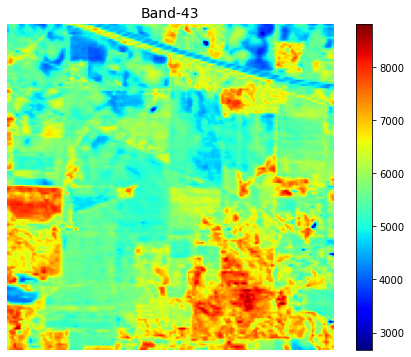

In [7]:
plot_band(dataset)

### 5. Visualizing ground truth of the image.

* The below code snippet plots the ground truth of the indian pines dataset.

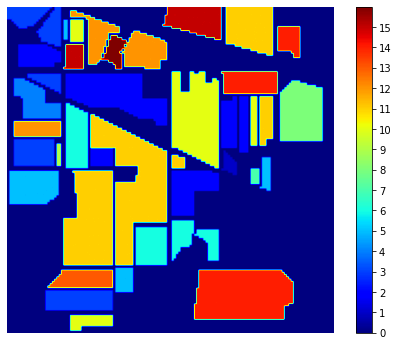

In [8]:
plt.figure(figsize=(8, 6))
plt.imshow(ground_truth, cmap='jet')
plt.axis('off')
plt.colorbar(ticks= range(0,16))
plt.show()

### 6. Extracting pixels of the HSI

The below function is used to extrac the pixels and class labels of the hyperspectral image.

In [9]:
!pip install tqdm

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
Defaulting to user installation because normal site-packages is not writeable


In [10]:
from tqdm import tqdm
import pandas as pd
def extract_pixels(dataset, ground_truth):
    df = pd.DataFrame()
    for i in tqdm(range(dataset.shape[2])):
        df = pd.concat([df, pd.DataFrame(dataset[:, :, i].ravel())], axis=1)
    df = pd.concat([df, pd.DataFrame(ground_truth.ravel())], axis=1)
    df.columns = [f'band-{i}' for i in range(1, 1+dataset.shape[2])]+['class']
    return df
        

In [11]:
df = extract_pixels(dataset, ground_truth)

100%|██████████| 200/200 [00:01<00:00, 159.14it/s]


In [12]:
df.head()

,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-192,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


Saving the data to a **csv** file.

In [13]:
df.to_csv('Dataset.csv', index=False)

### 7. Visualizing spectral signatures

The below function plots the spectral signature.

In [14]:
def plot_signature(df):
    plt.figure(figsize=(12, 6))
    pixel_no = np.random.randint(df.shape[0])
    plt.plot(range(1, 201), df.iloc[pixel_no, :-1].values.tolist(), 'b--', label= f'Class - {df.iloc[pixel_no, -1]}')
    plt.legend()
    plt.title(f'Pixel({pixel_no}) signature', fontsize=14)
    plt.xlabel('Band Number', fontsize=14)
    plt.ylabel('Pixel Intensity', fontsize=14)
    plt.show()
    

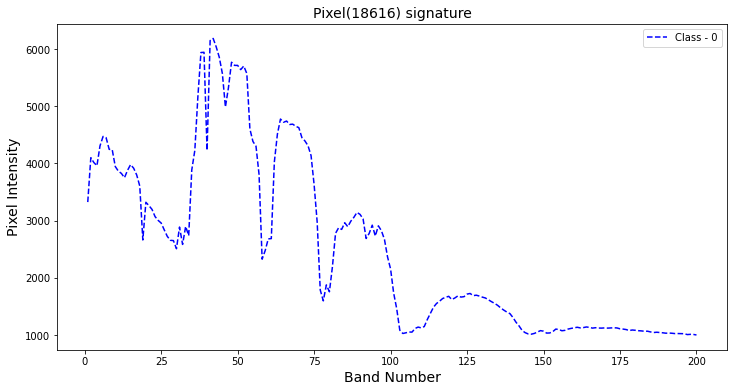

In [15]:
plot_signature(df)